<a href="https://colab.research.google.com/github/PurvanshBarodia/Modern-Machine-Learning/blob/main/Module%204/FMML20210266_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron
### Module Coordinator: Tanish Lad

In this lab, we will be studying the perceptron learning algorithm.



In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

First we need to define a labeled data set. Let's make a toy dataset.

In [ ]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

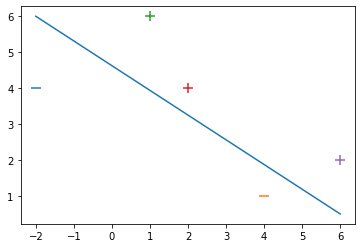

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

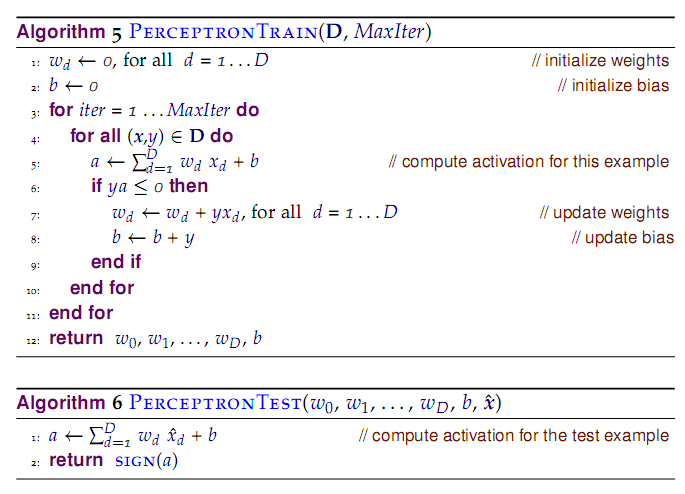

The algorithm is shown in the above image.

In [ ]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [ ]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

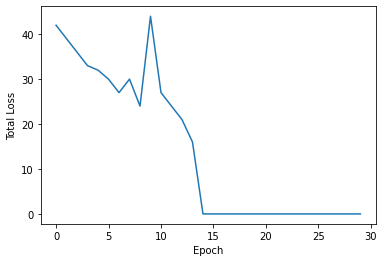

In [ ]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

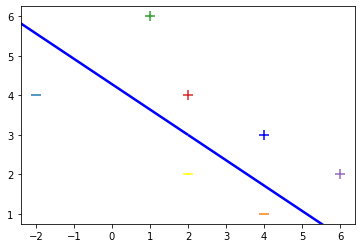

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


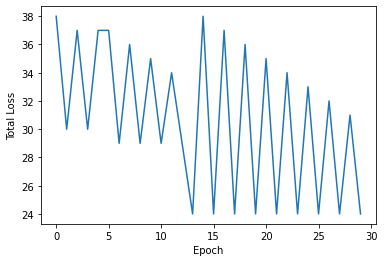

In [ ]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

1. Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
df = pd.read_csv('BankNote_Authentication.csv')

In [ ]:
df['class'].replace(to_replace=0, value=-1, inplace=True)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,-0.110787,0.994207,-1.0000,-1.000000,-1.00000,1.000000,1.0000


In [ ]:
# It is two class classification, there is No null values
# Seprate it into x and y
df['new'] = 1
X1 = np.array(df.drop('class',axis=1))
y1 = np.array(df['class'])


In [ ]:
def perceptron_graph(X,Y,iteration,A):
  w = np.zeros(len(X[0]))
  errors = []
  for i in range(iteration):
    total_error =0
    for k,l in enumerate(X):
      if (np.dot(X[k], w) * Y[k]) <=0:
        total_error += (np.dot(X[k], w) * Y[k])
        w = w + A * X[k] * Y[k]
    errors.append(total_error * -1)

  plt.plot(errors)
  plt.xlabel('Epoch')
  plt.ylabel('Total Loss')


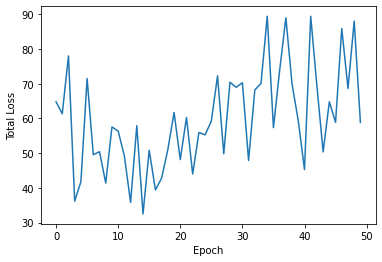

In [ ]:
perceptron_graph(X1,y1,50,0.2)

In [ ]:
# On small learning rate of 0.2 and large iteration it is not converging

# Perceptron never converge on data which are not linearly sepreble.

2) Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
df1 = pd.read_csv('iris.csv')

In [ ]:
df1 = df1.iloc[0:100]

In [ ]:
df1['species'] =df1['species'].replace(['setosa','versicolor'],['1','-1']).astype('int64')

In [ ]:
df1['New'] = 1

In [ ]:
X3 = np.array(df1.drop('species',axis=1))
y3 = np.array(df1['species'])

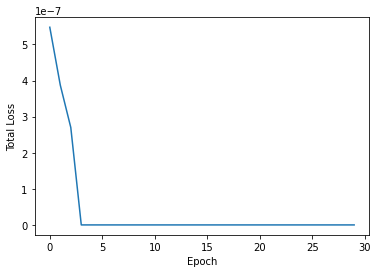

In [ ]:
perceptron_graph(X3,y3,30,0.00000001)

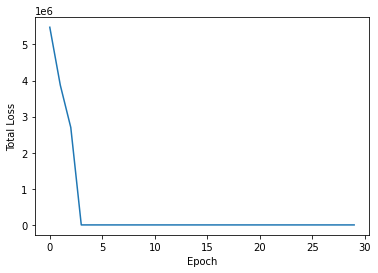

In [ ]:
perceptron_graph(X3,y3,30,100000)

In [ ]:
#Huge change in learning rate did'nt made any change here. In both case it converges after 3 iteretions.

# However genral observations are:
#   Too low learning rate - take more number of iteration to converge (Because it takes small steps)
#   Too High learnign rate - it may deverge inseted of converging

3. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it.

In [ ]:
X = np.array([
    [-3, 2, -1],
    [4, 1, -1],
    [-2, 2, -1],
    [2, 4, -1],
    [-1, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, -1, 1])

[-4. -1.  0.]


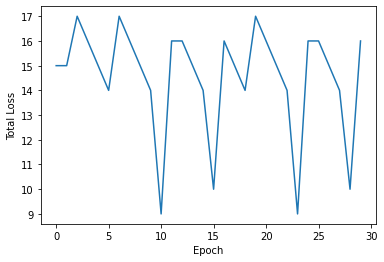

In [ ]:
print(perceptron_algo_plot(X, y))

In [ ]:
# It is repeting loss (weights) and not converging as this train data is not linearly separable.